# Modelisation TF-IDF sur données traduites fr


## Initialisation

Accès au dossier du projet sur Google Drive

In [ ]:
import sys
import os
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive/', force_remount=True)
    %cd drive/MyDrive/nov23_bds_rakuten
else:
    root_files = os.listdir()
    if not "requirements.txt" in root_files:
        print("The jupyter server root should be set to root of git project")
        print("If you're on vscode add the following to your settings.json file")
        print('"jupyter.notebookFileRoot": "${workspaceFolder}"')

Import des librairies

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump, load

In [ ]:
prdcodetype2label = {
    10 : "Livre occasion",
    40 : "Jeu vidéo, accessoire tech.",
    50 : "Accessoire Console",
    60 : "Console de jeu",
    1140 : "Figurine",
    1160 : "Carte Collection",
    1180 : "Jeu Plateau",
    1280 : "Jouet enfant, déguisement",
    1281 : "Jeu de société",
    1300 : "Jouet tech",
    1301 : "Paire de chaussettes",
    1302 : "Jeu extérieur, vêtement",
    1320 : "Autour du bébé",
    1560 : "Mobilier intérieur",
    1920 : "Chambre",
    1940 : "Cuisine",
    2060 : "Décoration intérieure",
    2220 : "Animal",
    2280 : "Revues et journaux",
    2403 : "Magazines, livres et BDs",
    2462 : "Jeu occasion",
    2522 : "Bureautique et papeterie",
    2582 : "Mobilier extérieur",
    2583 : "Autour de la piscine",
    2585 : "Bricolage",
    2705 : "Livre neuf",
    2905 : "Jeu PC",
}


Chargement du fichier source output/data-preprocessing-text-stopWord-steming

In [ ]:
X_pre_train = pd.read_csv('output/data-preprocessing-text-stopWord-steming/X_train_trad.csv', index_col = 0)
display(X_pre_train.head())

X_train = pd.DataFrame(X_pre_train['text_fr'])
y_train = pd.DataFrame(X_pre_train['prdtypecode'])
display(y_train.head())
display(X_train.head())
# Vérifier les dimensions des DataFrames après suppression
print("Dimensions de df :", X_pre_train.shape)
print("Dimensions de y  :", y_train.shape)

X_pre_test = pd.read_csv('output/data-preprocessing-text-stopWord-steming/X_test_trad.csv', index_col = 0)
X_test = pd.DataFrame(X_pre_test['text_fr'])
y_test = pd.DataFrame(X_pre_test['prdtypecode'])


,productid,imageid,text,lang,imagefile,prdtypecode,text_fr
0,131641431,885888766,Jesus - Cahiers Du Libre Avenir - Prêtre autre...,fr,10/image_885888766_product_131641431.jpg,10,avenir autrement jesus prêtre cahiers libre
1,745789761,1304710852,The Inglorious Arts Of Peace: Exhibitions In C...,en,10/image_1304710852_product_745789761.jpg,10,canadienne sans xixe paix gloire exposition ar...
2,651353882,1033554185,Lecons De Sciences - Cours Superieur - Premier...,fr,10/image_1033554185_product_651353882.jpg,10,science annee cours premiere lecons superieur ...
3,4043473264,1306457352,Generations Of Women Historians -,en,10/image_1306457352_product_4043473264.jpg,10,historiens femmes générations
4,679913105,1034656535,Oeuvres Dramatiques De F. Schiller Tome 6 -,fr,10/image_1034656535_product_679913105.jpg,10,tome dramatiques oeuvre schiller


,prdtypecode
0,10
1,10
2,10
3,10
4,10


,text_fr
0,avenir autrement jesus prêtre cahiers libre
1,canadienne sans xixe paix gloire exposition ar...
2,science annee cours premiere lecons superieur ...
3,historiens femmes générations
4,tome dramatiques oeuvre schiller


Dimensions de df : (109566, 7)
Dimensions de y  : (109566, 1)


## Bag of words

Nettoyage de quelques lignes NaN

Je ne comprends pas l'origine de ces lignes qui n'apparaîssent pas en sortie du préprocessing

In [ ]:
# Identifier les lignes où la colonne 'text' contient NaN
lignes_avec_nan = X_train['text_fr'].isna()

# Afficher les lignes avec NaN
print("\nLignes avec NaN dans la colonne 'text_fr' de X_train:")
print(X_train.loc[lignes_avec_nan])

# Supprimer les lignes avec des valeurs NaN
X_train = X_train.dropna(subset=['text_fr'])

# Supprimer les lignes correspondantes dans y en utilisant l'index des lignes identifiées dans df
y_train = y_train.drop(index = y_train[lignes_avec_nan].index)

# Vérifier les dimensions des DataFrames après suppression
print("Dimensions de df après suppression :", X_train.shape)
print("Dimensions de y après suppression :", y_train.shape)


Lignes avec NaN dans la colonne 'text_fr' de X_train:
      text_fr
269       NaN
635       NaN
41377     NaN
64127     NaN
Dimensions de df après suppression : (109562, 1)
Dimensions de y après suppression : (109562, 1)


In [ ]:
# Identifier les lignes où la colonne 'text_fr' contient NaN
lignes_avec_nan = X_test['text_fr'].isna()

# Afficher les lignes avec NaN
print("\nLignes avec NaN dans la colonne 'text_fr' de X_test:")
print(X_test.loc[lignes_avec_nan])

# Supprimer les lignes avec des valeurs NaN
X_test = X_test.dropna(subset=['text_fr'])

# Supprimer les lignes correspondantes dans y en utilisant l'index des lignes identifiées dans df
y_test = y_test.drop(index = y_test[lignes_avec_nan].index)

# Vérifier les dimensions des DataFrames après suppression
print("Dimensions de df après suppression :", X_test.shape)
print("Dimensions de y après suppression :", y_test.shape)


Lignes avec NaN dans la colonne 'text_fr' de X_test:
      text_fr
index        
40185     NaN
Dimensions de df après suppression : (8491, 1)
Dimensions de y après suppression : (8491, 1)


## Vectorisation

In [ ]:
# Créer un vectorisateur
vectorizer = CountVectorizer()

# Appliquer CountVectorizer au texte lemmatisé
X_train_counts = vectorizer.fit_transform(X_train.text_fr)
X_test_counts = vectorizer.transform(X_test.text_fr)

In [ ]:
X_train_counts.shape

(109562, 136033)

## transformation TF-IDF

In [ ]:
# Initialiser le transformateur TF-IDF
tfidf_transformer = TfidfTransformer()

# Appliquer la transformation TF-IDF
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


In [ ]:
X_train_tfidf.shape

(109562, 136033)

# Modélisation

## RandomForestClassifier

### Entrainement du modèle rfc, puis stockage

In [ ]:
modele_rfc = RandomForestClassifier(random_state=123)
modele_rfc.fit(X_train_tfidf, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = modele_rfc.predict(X_test_tfidf)

<ipython-input-26-315ed3314119>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modele_rfc.fit(X_train_tfidf, y_train)


In [ ]:
# Enregistrer le modèle dans un fichier
dump(modele_rfc, 'c:/Users/Karim/datascientest/rakuten/output/data-modeling-text-1/modele_rfc.joblib')

['c:/Users/Karim/datascientest/rakuten/output/data-modeling-text-1/modele_rfc.joblib']

In [ ]:
# Code pour charger le modèle rfc
modele_rfc = load('c:/Users/Karim/datascientest/rakuten/output/data-modeling-text-1/modele_rfc.joblib')
# Faire des prédictions sur l'ensemble de test
y_pred = modele_rfc.predict(X_test_tfidf)

### Résultats du RFC

Ajout des labels de classe pour visu

In [ ]:

y_test_visu = y_test['prdtypecode'].map(prdcodetype2label)
y_pred_visu = [prdcodetype2label.get(code, "Label") for code in y_pred]


NameError: name 'y_pred' is not defined

Score du modèle : 0.7755270286185373


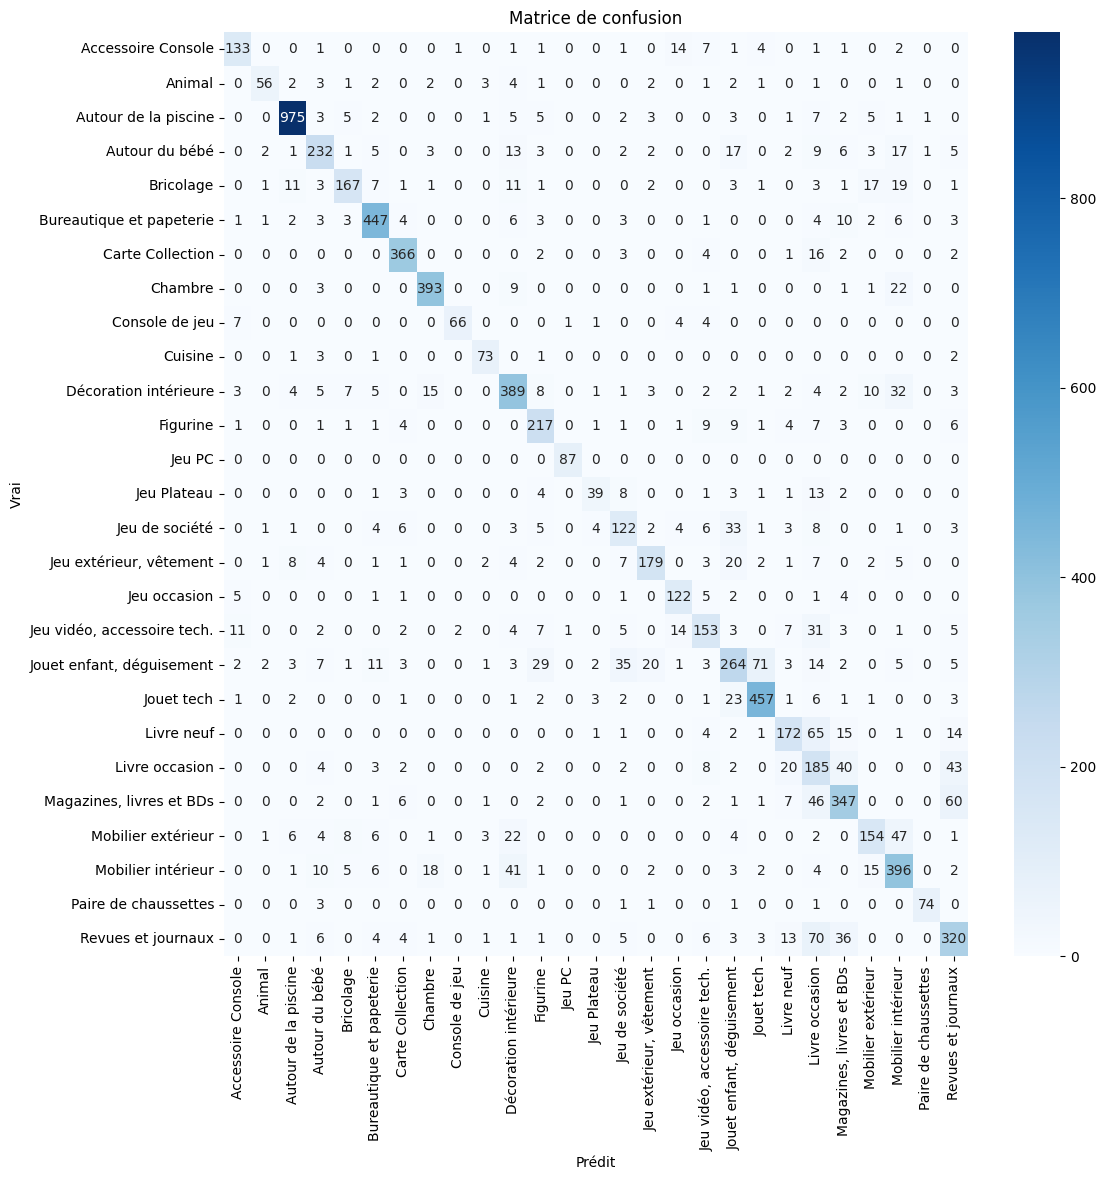

In [ ]:
# Calculer le score du modèle
score = accuracy_score(y_test_visu, y_pred_visu)
print("Score du modèle :", score)

# Créer et afficher la matrice de confusion
mat_conf = pd.crosstab(y_test_visu, y_pred_visu)

plt.figure(figsize=(12, 12))
sns.heatmap(mat_conf, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.show()

In [ ]:
print(classification_report(y_test_visu, y_pred_visu))

                             precision    recall  f1-score   support

         Accessoire Console       0.81      0.79      0.80       168
                     Animal       0.86      0.68      0.76        82
       Autour de la piscine       0.96      0.95      0.96      1021
             Autour du bébé       0.78      0.72      0.74       324
                  Bricolage       0.84      0.67      0.74       250
   Bureautique et papeterie       0.88      0.90      0.89       499
           Carte Collection       0.91      0.92      0.92       396
                    Chambre       0.91      0.91      0.91       431
             Console de jeu       0.96      0.80      0.87        83
                    Cuisine       0.85      0.90      0.87        81
      Décoration intérieure       0.75      0.78      0.77       499
                   Figurine       0.73      0.81      0.77       267
                     Jeu PC       0.98      1.00      0.99        87
                Jeu Plateau      

### Fonction pour faire des prédictions

In [ ]:
def predict_modele_rfc(text):
    # Créer un DataFrame de test
    df_test = pd.DataFrame({'texte': [text]})
    # Vectorisation
    X_phrase = vectorizer.transform(df_test['texte'])
    X_phrase_tfidf = tfidf_transformer.transform(X_phrase)
    # Prédiction
    y_phrase = modele_rfc.predict(X_phrase_tfidf)

    return print("Prédiction pour le texte :", text, "\n ->", prdcodetype2label[y_phrase[0]])

Test de prédiction :

In [ ]:
phrase = "Moakoada®Abs Congélateur Teether Sensorielle Jouet Pour 0 À 12 Mois Les Bébés - ABS congélateur Teether sensorielle Jouet pour 0 à 12 mois les bébés Présentation du produit: soulagez votre TEETHING BÉBÉ ET MALAISE DE LA DOULEUR - rehausseurs sont maman et de papa de lifesavers pendant l'étape de dentition. Ils fonctionnent comme des sucettes mais encore mieux avec les courbes et les textures qui massent les gencives de vos enfants et de stimuler la croissance de leurs dents. AIDER ENCOURAGER LE DÉVELOPPEMENT DU CERVEAU ET L'APPRENTISSAGE TACTILE - Chaque bébé a une teether conception colorée d'amusement et la texture qui fait vraiment bon pour bébé jouets sensorielles. Mis à part qu'ils sont amusants à jouer ils offrent également l'apprentissage visuel et tactile sans danger pour bébé. Ce jouet pour bébé sucette a une conception solide ou n'a pas de petites pièces à mordre il est certainement bébés. AVEC FONCTION CONÇU DANS L'ESPRIT - Le bébé jouet de dentition s'adapte parfaitement dans la bouche de votre bébé mais il est juste la bonne taille pour ne pas poser un risque d'étouffement. Les poignées sont conçus de sorte qu'ils peuvent être facilement saisis par les petites mains. La conception fonctionnelle rend également chaque teether très facile à nettoyer et à ranger. ABS matériau non toxique est adopté ce qui peut être bouillie à emballage haute température: un ensemble de 10 pièces de bébé Conseils Teether: Cuites à haute température pendant moins d'une demi-minute Ne pas utiliser l'eau froide pour refroidir immédiatement après la désinfection sinon il provoque une déformation du produit. sinon il causera la déformation du produit. sinon il causera la déformation du produit."
predict_modele_rfc(phrase)

phrase = "Lot de 8 préfiltres jetables pour panier de skimmer - Marina - Lots de 8 pré-filtres jetables de la marque Marina. Universels ils sont compatibles avec touts les paniers de skimmer mesurant jusqu'à 40 cm de diamètre."
predict_modele_rfc(phrase)

phrase = "Mario Kart 8 Deluxe Switch - Jeu video Nintendo Switch Bananes et carapaces sur place ou à emporter !"
predict_modele_rfc(phrase)

phrase = "du texte au pif avec une pelle pour faire penser au jardin"
predict_modele_rfc(phrase)

phrase = "Avec une pelle pour faire penser au jardin"
predict_modele_rfc(phrase)

phrase = "Avec une pelle près de la piscine pour faire penser au jardin"
predict_modele_rfc(phrase)

Prédiction pour le texte : Moakoada®Abs Congélateur Teether Sensorielle Jouet Pour 0 À 12 Mois Les Bébés - ABS congélateur Teether sensorielle Jouet pour 0 à 12 mois les bébés Présentation du produit: soulagez votre TEETHING BÉBÉ ET MALAISE DE LA DOULEUR - rehausseurs sont maman et de papa de lifesavers pendant l'étape de dentition. Ils fonctionnent comme des sucettes mais encore mieux avec les courbes et les textures qui massent les gencives de vos enfants et de stimuler la croissance de leurs dents. AIDER ENCOURAGER LE DÉVELOPPEMENT DU CERVEAU ET L'APPRENTISSAGE TACTILE - Chaque bébé a une teether conception colorée d'amusement et la texture qui fait vraiment bon pour bébé jouets sensorielles. Mis à part qu'ils sont amusants à jouer ils offrent également l'apprentissage visuel et tactile sans danger pour bébé. Ce jouet pour bébé sucette a une conception solide ou n'a pas de petites pièces à mordre il est certainement bébés. AVEC FONCTION CONÇU DANS L'ESPRIT - Le bébé jouet de dentiti

## GradientBoostingClassifier

### Entrainement du modèle gbc

In [ ]:
modele_gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 1, random_state = 123)
modele_gbc.fit(X_train_tfidf, y_train)


In [ ]:
# Faire des prédictions sur l'ensemble de test
y_pred_gbc = modele_gbc.predict(X_test_tfidf)

### Résultats du GBC

Ajout des labels de classe pour visu

In [ ]:
y_test_visu = y_test['prdtypecode'].map(prdcodetype2label)
y_pred_visu = [prdcodetype2label.get(code, "Label") for code in y_pred_gbc]

Score du modèle : 0.6846072311859616


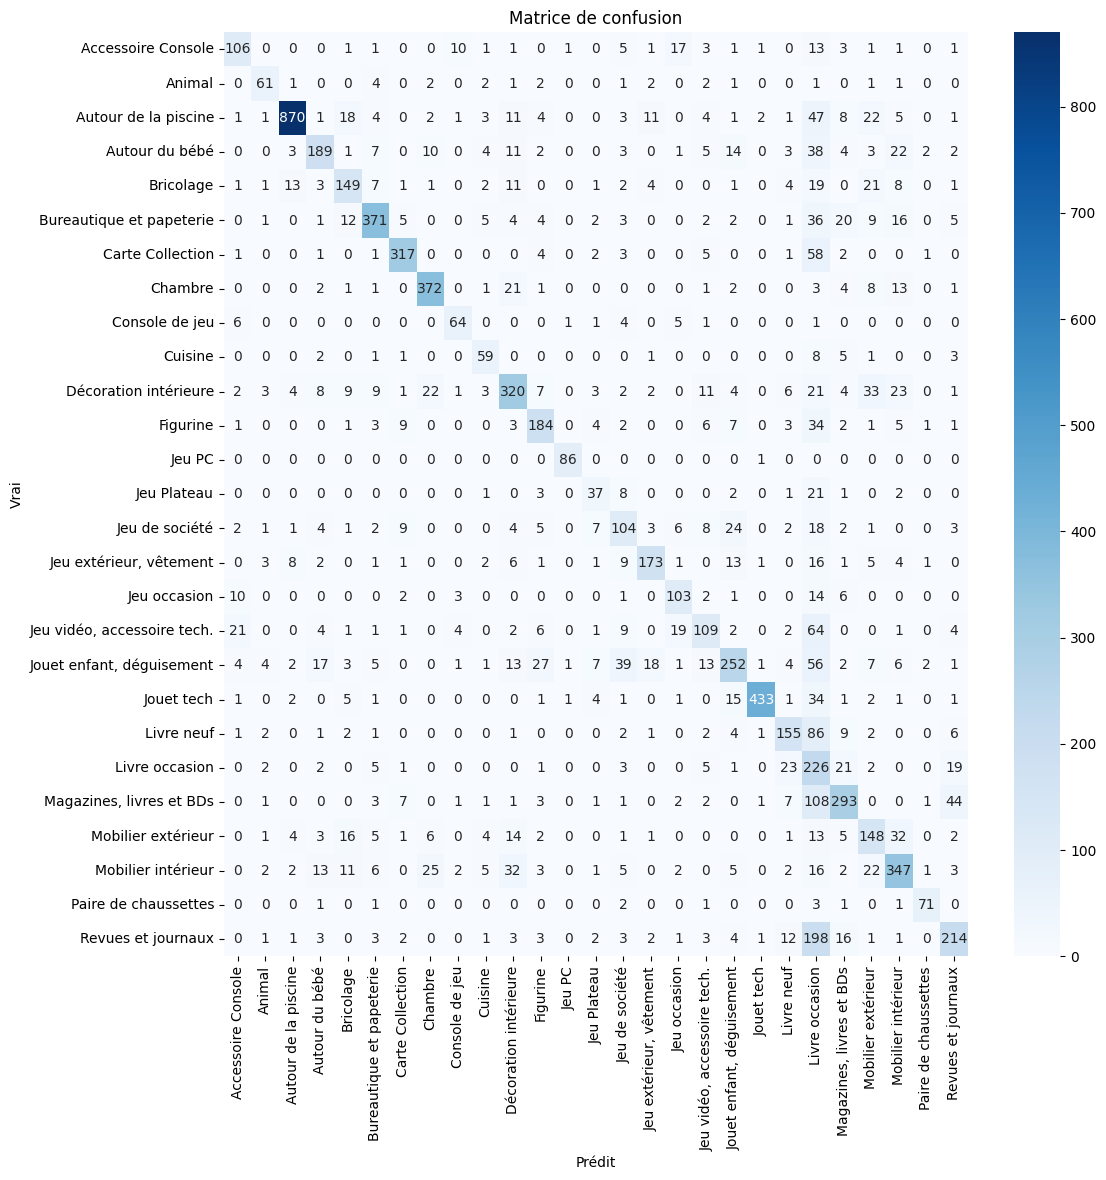

In [ ]:
# Calculer le score du modèle
score = accuracy_score(y_test_visu, y_pred_visu)
print("Score du modèle :", score)

# Créer et afficher la matrice de confusion
mat_conf = pd.crosstab(y_test_visu, y_pred_visu)

plt.figure(figsize=(12, 12))
sns.heatmap(mat_conf, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.show()

In [ ]:
print(classification_report(y_test_visu, y_pred_visu))

                             precision    recall  f1-score   support

         Accessoire Console       0.68      0.63      0.65       168
                     Animal       0.73      0.74      0.73        82
       Autour de la piscine       0.95      0.85      0.90      1021
             Autour du bébé       0.74      0.58      0.65       324
                  Bricolage       0.65      0.60      0.62       250
   Bureautique et papeterie       0.84      0.74      0.79       499
           Carte Collection       0.89      0.80      0.84       396
                    Chambre       0.85      0.86      0.85       431
             Console de jeu       0.74      0.77      0.75        83
                    Cuisine       0.62      0.73      0.67        81
      Décoration intérieure       0.70      0.64      0.67       499
                   Figurine       0.70      0.69      0.69       267
                     Jeu PC       0.96      0.99      0.97        87
                Jeu Plateau      

## SVM

### Entrainement du modèle svm

In [ ]:
# Création du modèle SVM avec des paramètres par défaut
model_svm = SVC(probability = True)

# Entraînement du modèle avec les données d'entraînement
model_svm.fit(X_train_tfidf, y_train)

# Enregistrer le modèle dans un fichier
dump(model_svm, 'output/data-modeling-text-1bis/model_10_svm.joblib')

In [ ]:
# Faire des prédictions sur l'ensemble de test
y_pred_svm = model_svm.predict(X_test_tfidf)

In [ ]:
# Utiliser predict_proba pour obtenir les probabilités
y_pred_proba_svm = model_svm.predict_proba(X_test_tfidf)

# Afficher les probabilités pour les premiers échantillons
print(y_pred_proba_svm[:5])

[[1.98124814e-02 1.85335165e-02 2.20776688e-03 3.18919622e-04
  6.53597399e-03 2.52022481e-03 7.68010614e-04 3.08015666e-01
  3.41921424e-02 5.52549416e-02 3.65432614e-04 2.95543494e-01
  1.57412659e-02 1.25134761e-02 5.54139801e-03 5.97972939e-04
  5.77321787e-02 1.07293099e-03 7.25891461e-03 5.81028142e-03
  9.54587349e-04 1.48156270e-02 3.31775963e-02 2.49028406e-02
  3.17111691e-02 4.35072922e-02 5.93898895e-04]
 [2.00803069e-06 7.02549831e-04 6.37892344e-06 1.50384446e-06
  3.46648475e-05 1.48083497e-06 1.69330630e-06 9.78449770e-01
  1.45720383e-02 1.72331930e-05 2.15765293e-06 6.07162390e-04
  5.12831906e-03 3.49113137e-05 1.15115053e-05 8.61471198e-07
  3.76730291e-04 1.03968155e-05 1.45919848e-06 1.18250588e-06
  4.69551215e-06 8.51086356e-06 7.01555074e-06 7.14876153e-06
  6.28419664e-06 1.44671045e-06 8.85045416e-07]
 [1.79286404e-05 1.62062014e-05 2.26364437e-05 1.43716813e-05
  4.06882727e-05 1.24194837e-05 9.06867720e-06 1.31445791e-04
  3.66035495e-05 2.39023185e-05 1.39

In [ ]:
# Enregistrer le modèle dans un fichier
dump(model_svm, 'output/data-modeling-text-1bis/model_10_svm.joblib')

['output/data-modeling-text-1bis/model_10_svm.joblib']

## **Résultats du SVM**

Ajout des labels de classe pour visu

In [ ]:
y_test_visu = y_test['prdtypecode'].astype('str') + ": " + y_test['prdtypecode'].map(prdcodetype2label)
y_pred_visu = [code.astype('str') + ": " + prdcodetype2label.get(code, "Label") for code in y_pred_svm]

Score du modèle : 0.8136850783182193


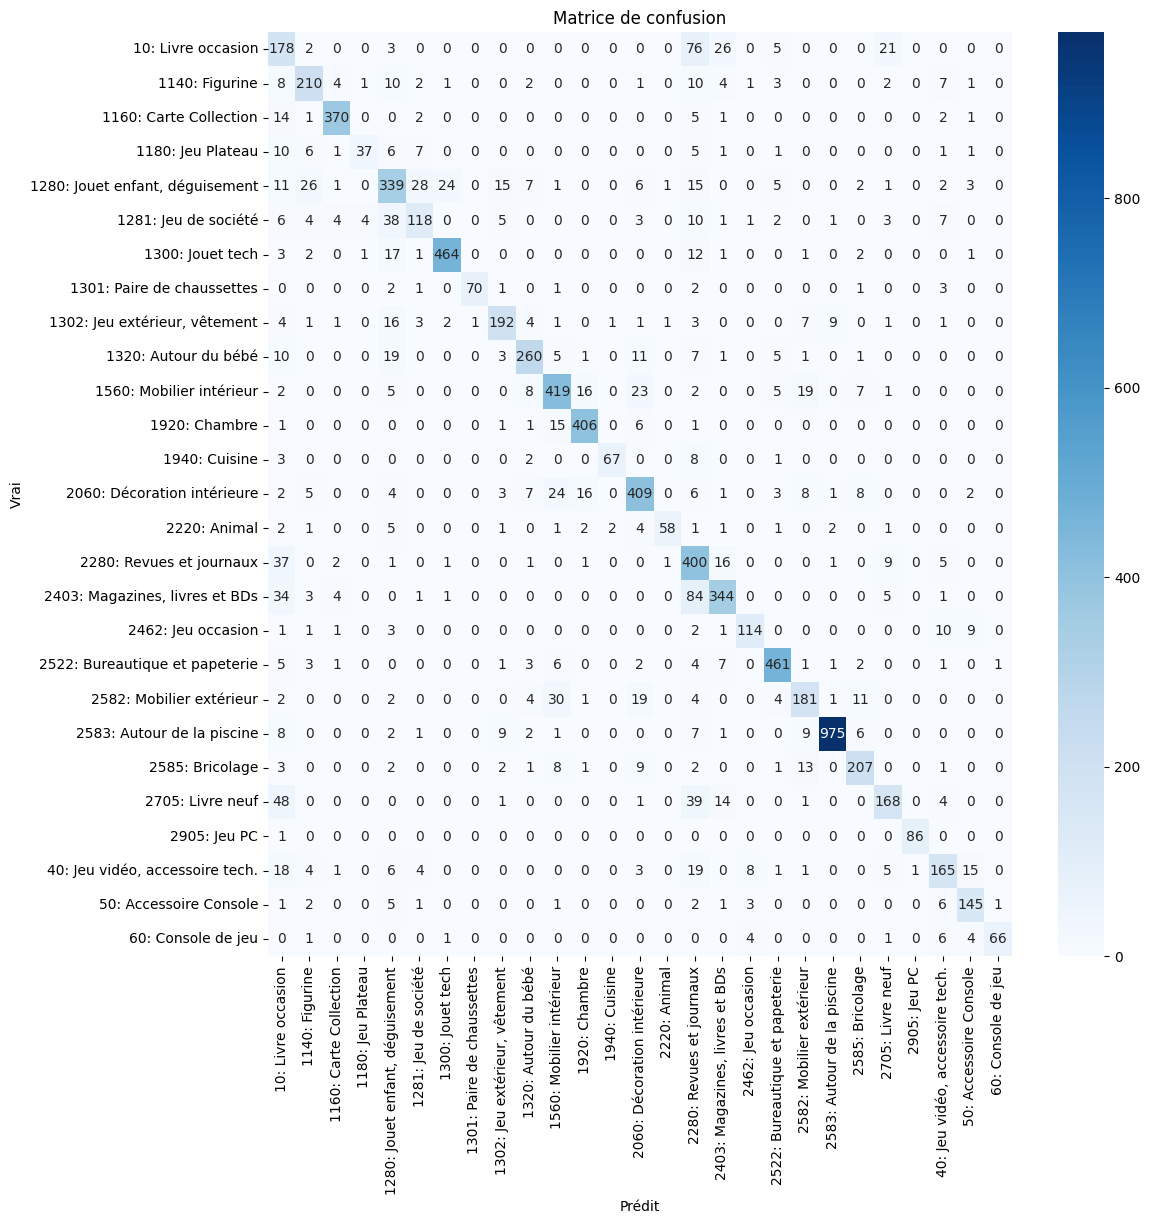

In [ ]:
# Calculer le score du modèle
score = accuracy_score(y_test_visu, y_pred_visu)
print("Score du modèle :", score)

# Créer et afficher la matrice de confusion
mat_conf = pd.crosstab(y_test_visu, y_pred_visu)

plt.figure(figsize=(12, 12))
sns.heatmap(mat_conf, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.show()

In [ ]:
print(classification_report(y_test_visu, y_pred_visu))

                                 precision    recall  f1-score   support

             10: Livre occasion       0.43      0.57      0.49       311
                 1140: Figurine       0.77      0.79      0.78       267
         1160: Carte Collection       0.95      0.93      0.94       396
              1180: Jeu Plateau       0.86      0.49      0.62        76
1280: Jouet enfant, déguisement       0.70      0.70      0.70       487
           1281: Jeu de société       0.70      0.57      0.63       207
               1300: Jouet tech       0.94      0.92      0.93       505
     1301: Paire de chaussettes       0.99      0.86      0.92        81
  1302: Jeu extérieur, vêtement       0.82      0.77      0.80       249
           1320: Autour du bébé       0.86      0.80      0.83       324
       1560: Mobilier intérieur       0.82      0.83      0.82       507
                  1920: Chambre       0.91      0.94      0.93       431
                  1940: Cuisine       0.96      0.

Export des rapports de classification

In [ ]:
report = classification_report(y_test, y_pred_svm, output_dict=True)

# Convertir le dictionnaire en DataFrame
report_df = pd.DataFrame(report).transpose()
# Enregistrer le DataFrame en fichier CSV
report_df.to_csv('output/data-modeling-text-1bis/classification_report_10_svm.csv', index=True)

In [ ]:
# Faire des prédictions sur l'ensemble de train
y_pred_train_svm = model_svm.predict(X_train_tfidf)

In [ ]:
y_train_visu = y_train['prdtypecode'].map(prdcodetype2label)
y_pred_train_visu = [prdcodetype2label.get(code, "Label") for code in y_pred_train_svm]

In [ ]:
print(classification_report(y_train_visu, y_pred_train_visu))

                             precision    recall  f1-score   support

         Accessoire Console       0.99      1.00      0.99      4058
                     Animal       1.00      1.00      1.00      4058
       Autour de la piscine       1.00      1.00      1.00      4058
             Autour du bébé       0.99      0.99      0.99      4058
                  Bricolage       0.99      0.99      0.99      4058
   Bureautique et papeterie       0.99      1.00      0.99      4058
           Carte Collection       1.00      1.00      1.00      4058
                    Chambre       0.96      0.99      0.97      4058
             Console de jeu       1.00      1.00      1.00      4058
                    Cuisine       1.00      1.00      1.00      4058
      Décoration intérieure       0.97      0.95      0.96      4058
                   Figurine       0.98      1.00      0.99      4058
                     Jeu PC       1.00      1.00      1.00      4058
                Jeu Plateau      

## grid_search SVM

Créer un classificateur SVM

In [ ]:
svm_classifier = SVC()

Définir la grille des paramètres à rechercher

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],    # [0.1, 1, 10]
    'kernel': ['linear'], # ['linear', 'rbf', 'poly']
    'gamma': [0.1, 1, 'auto'],
    'degree': [2, 3, 4]
}

Recherche des meilleurs hyperparamètres

In [ ]:
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

In [ ]:
# Créez un DataFrame à partir des résultats de la recherche par grille
results_df = pd.DataFrame(grid_search.cv_results_)

# Sélectionnez les colonnes pertinentes (paramètres et métriques de performance)
selected_columns = ['param_C', 'param_kernel', 'param_gamma', 'param_degree', 'mean_test_score', 'std_test_score']
results_df = results_df[selected_columns]

# Triez les résultats par la métrique de performance souhaitée (par exemple, la précision)
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Affichez la table des résultats
print(results_df)

In [ ]:
# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres : ", grid_search.best_params_)

Utiliser les meilleurs paramètres trouvés avec la recherche par grille

In [ ]:
best_svm = grid_search.best_estimator_

# Faire des prédictions sur l'ensemble de test
y_pred_svm_gs = best_svm.predict(X_test_tfidf)

### **Résultats du SVM GS**

Ajout des labels de classe pour visu

In [ ]:
y_test_visu = y_test['prdtypecode'].map(prdcodetype2label)
y_pred_visu = [prdcodetype2label.get(code, "Label") for code in y_pred_svm_gs]

In [ ]:
# Calculer le score du modèle
score = accuracy_score(y_test_visu, y_pred_visu)
print("Score du modèle :", score)

# Créer et afficher la matrice de confusion
mat_conf = pd.crosstab(y_test_visu, y_pred_visu)

plt.figure(figsize=(12, 12))
sns.heatmap(mat_conf, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.show()

In [ ]:
print(classification_report(y_test_visu, y_pred_visu))